In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import requests
import json
import csv
import gmaps
# Google API Key
from config import gkey
from pprint import pprint
#gkey

In [17]:
#Read LA county house price list
merge_counts_city = pd.read_csv("merge_counts_city.csv")

In [28]:
merge_counts_city['locationc']=merge_counts_city[['RegionName','counts']].apply(lambda x:'{},{}'.format(x[0],x[1]),axis=1)
merge_counts_city.head()

,Unnamed: 0,RegionName,State,CountyName,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,House Price Ranking,counts,locationc
0,0,Los Angeles,CA,Los Angeles,714700.0,7.0,NaN,4.7,33.988828,-118.334002,Mid,4191,"Los Angeles,4191"
1,1,Los Angeles,CA,Los Angeles,714700.0,11.0,2.0,4.6,34.047626,-118.327614,Mid,4191,"Los Angeles,4191"
2,2,Los Angeles,CA,Los Angeles,714700.0,12.0,NaN,4.0,34.051603,-118.255075,Mid,4191,"Los Angeles,4191"
3,3,Los Angeles,CA,Los Angeles,714700.0,15.0,2.0,4.5,34.077119,-118.258720,Mid,4191,"Los Angeles,4191"
4,4,Los Angeles,CA,Los Angeles,714700.0,16.0,2.0,4.5,34.082818,-118.324159,Mid,4191,"Los Angeles,4191"


In [29]:
drop_merge_d=merge_counts_city.drop_duplicates(['locationc'],keep='first')
drop_merge_d

,Unnamed: 0,RegionName,State,CountyName,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,House Price Ranking,counts,locationc
0,0,Los Angeles,CA,Los Angeles,714700.0,7.0,NaN,4.7,33.988828,-118.334002,Mid,4191,"Los Angeles,4191"
37,37,Long Beach,CA,Los Angeles,633200.0,5.0,2.0,4.6,33.770631,-118.182211,Mid,635,"Long Beach,635"
42,42,Glendale,CA,Los Angeles,927000.0,NaN,NaN,NaN,NaN,NaN,High,23,"Glendale,23"
43,43,Pomona,CA,Los Angeles,422000.0,NaN,NaN,NaN,NaN,NaN,Low,1,"Pomona,1"
44,44,Pasadena,CA,Los Angeles,921500.0,77.0,2.0,4.3,34.141030,-118.131874,High,40,"Pasadena,40"
45,45,Torrance,CA,Los Angeles,866700.0,0.0,2.0,4.6,33.836677,-118.318935,High,1397,"Torrance,1397"
53,53,Inglewood,CA,Los Angeles,571700.0,6.0,2.0,4.6,33.963342,-118.351597,Mid,12,"Inglewood,12"
57,57,Downey,CA,Los Angeles,572400.0,NaN,NaN,NaN,NaN,NaN,Mid,3,"Downey,3"
58,58,Norwalk,CA,Los Angeles,480100.0,61.0,NaN,4.4,33.902809,-118.053914,Low,43,"Norwalk,43"
59,59,Santa Monica,CA,Los Angeles,2665300.0,13.0,2.0,4.6,34.016769,-118.491276,High,1381,"Santa Monica,1381"


In [27]:
merge_counts_city

,Unnamed: 0,RegionName,State,CountyName,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,House Price Ranking,counts
0,0,Los Angeles,CA,Los Angeles,714700.0,7.0,NaN,4.7,33.988828,-118.334002,Mid,4191
1,1,Los Angeles,CA,Los Angeles,714700.0,11.0,2.0,4.6,34.047626,-118.327614,Mid,4191
2,2,Los Angeles,CA,Los Angeles,714700.0,12.0,NaN,4.0,34.051603,-118.255075,Mid,4191
3,3,Los Angeles,CA,Los Angeles,714700.0,15.0,2.0,4.5,34.077119,-118.258720,Mid,4191
4,4,Los Angeles,CA,Los Angeles,714700.0,16.0,2.0,4.5,34.082818,-118.324159,Mid,4191
5,5,Los Angeles,CA,Los Angeles,714700.0,17.0,2.0,4.3,34.083804,-118.273852,Mid,4191
6,6,Los Angeles,CA,Los Angeles,714700.0,18.0,2.0,4.5,34.078587,-118.376420,Mid,4191
7,7,Los Angeles,CA,Los Angeles,714700.0,25.0,NaN,4.7,33.988828,-118.334002,Mid,4191
8,8,Los Angeles,CA,Los Angeles,714700.0,29.0,NaN,4.0,34.051603,-118.255075,Mid,4191
9,9,Los Angeles,CA,Los Angeles,714700.0,30.0,2.0,4.5,34.077119,-118.258720,Mid,4191


In [26]:
merge_counts_gp=merge_counts_city.groupby(['counts']).max()

In [24]:
merge_counts_gp

,Unnamed: 0,RegionName,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude
counts,,,,,,,,
1,104,San Pedro,422000.0,NaN,NaN,NaN,NaN,NaN
3,79,Hacienda Heights,683900.0,NaN,NaN,NaN,NaN,NaN
6,105,Studio City,NaN,NaN,NaN,NaN,NaN,NaN
7,94,Claremont,701700.0,NaN,NaN,NaN,NaN,NaN
8,80,Cerritos,742700.0,60.0,NaN,4.3,33.866461,-118.092799
12,56,Inglewood,571700.0,84.0,2.0,4.6,33.963342,-118.351597
16,100,Irvine,NaN,NaN,NaN,NaN,NaN,NaN
18,107,Yorba Linda,NaN,NaN,NaN,NaN,NaN,NaN
23,78,San Gabriel,927000.0,66.0,NaN,4.4,34.079612,-118.093476


In [30]:
# replace NAN TO 0 VALUE
drop_merge_d.fillna(0)

,Unnamed: 0,RegionName,State,CountyName,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,House Price Ranking,counts,locationc
0,0,Los Angeles,CA,Los Angeles,714700.0,7.0,0.0,4.7,33.988828,-118.334002,Mid,4191,"Los Angeles,4191"
37,37,Long Beach,CA,Los Angeles,633200.0,5.0,2.0,4.6,33.770631,-118.182211,Mid,635,"Long Beach,635"
42,42,Glendale,CA,Los Angeles,927000.0,0.0,0.0,0.0,0.000000,0.000000,High,23,"Glendale,23"
43,43,Pomona,CA,Los Angeles,422000.0,0.0,0.0,0.0,0.000000,0.000000,Low,1,"Pomona,1"
44,44,Pasadena,CA,Los Angeles,921500.0,77.0,2.0,4.3,34.141030,-118.131874,High,40,"Pasadena,40"
45,45,Torrance,CA,Los Angeles,866700.0,0.0,2.0,4.6,33.836677,-118.318935,High,1397,"Torrance,1397"
53,53,Inglewood,CA,Los Angeles,571700.0,6.0,2.0,4.6,33.963342,-118.351597,Mid,12,"Inglewood,12"
57,57,Downey,CA,Los Angeles,572400.0,0.0,0.0,0.0,0.000000,0.000000,Mid,3,"Downey,3"
58,58,Norwalk,CA,Los Angeles,480100.0,61.0,0.0,4.4,33.902809,-118.053914,Low,43,"Norwalk,43"
59,59,Santa Monica,CA,Los Angeles,2665300.0,13.0,2.0,4.6,34.016769,-118.491276,High,1381,"Santa Monica,1381"


In [31]:
drop_merge_d=drop_merge_d.loc[drop_merge_d.State=='CA']
drop_merge_d

,Unnamed: 0,RegionName,State,CountyName,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,House Price Ranking,counts,locationc
0,0,Los Angeles,CA,Los Angeles,714700.0,7.0,NaN,4.7,33.988828,-118.334002,Mid,4191,"Los Angeles,4191"
37,37,Long Beach,CA,Los Angeles,633200.0,5.0,2.0,4.6,33.770631,-118.182211,Mid,635,"Long Beach,635"
42,42,Glendale,CA,Los Angeles,927000.0,NaN,NaN,NaN,NaN,NaN,High,23,"Glendale,23"
43,43,Pomona,CA,Los Angeles,422000.0,NaN,NaN,NaN,NaN,NaN,Low,1,"Pomona,1"
44,44,Pasadena,CA,Los Angeles,921500.0,77.0,2.0,4.3,34.141030,-118.131874,High,40,"Pasadena,40"
45,45,Torrance,CA,Los Angeles,866700.0,0.0,2.0,4.6,33.836677,-118.318935,High,1397,"Torrance,1397"
53,53,Inglewood,CA,Los Angeles,571700.0,6.0,2.0,4.6,33.963342,-118.351597,Mid,12,"Inglewood,12"
57,57,Downey,CA,Los Angeles,572400.0,NaN,NaN,NaN,NaN,NaN,Mid,3,"Downey,3"
58,58,Norwalk,CA,Los Angeles,480100.0,61.0,NaN,4.4,33.902809,-118.053914,Low,43,"Norwalk,43"
59,59,Santa Monica,CA,Los Angeles,2665300.0,13.0,2.0,4.6,34.016769,-118.491276,High,1381,"Santa Monica,1381"


In [78]:
drop_merge_gp=drop_merge_d.groupby(['House Price Ranking']).sum()

In [79]:
drop_merge_gp

,Unnamed: 0,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,counts
House Price Ranking,,,,,,,,
High,682,13736700.0,265.0,10.0,40.5,305.995893,-1064.651706,4920
Low,101,902100.0,61.0,0.0,4.4,33.902809,-118.053914,44
Mid,470,5200500.0,78.0,4.0,18.2,135.589261,-472.960609,4884


In [92]:
result = drop_merge_gp.sort_values(['counts'], ascending=[0])
result

,Unnamed: 0,2018-05,Unnamed: 0.1,Price level,Rating,Latitude,Longitude,counts
House Price Ranking,,,,,,,,
High,682,13736700.0,265.0,10.0,40.5,305.995893,-1064.651706,4920
Mid,470,5200500.0,78.0,4.0,18.2,135.589261,-472.960609,4884
Low,101,902100.0,61.0,0.0,4.4,33.902809,-118.053914,44


In [93]:
# Create an array that contains the number of users each language has
house_value = result['counts']
x_axis = np.arange(len(house_value))
x_axis

array([0, 1, 2])

<IPython.core.display.Javascript object>


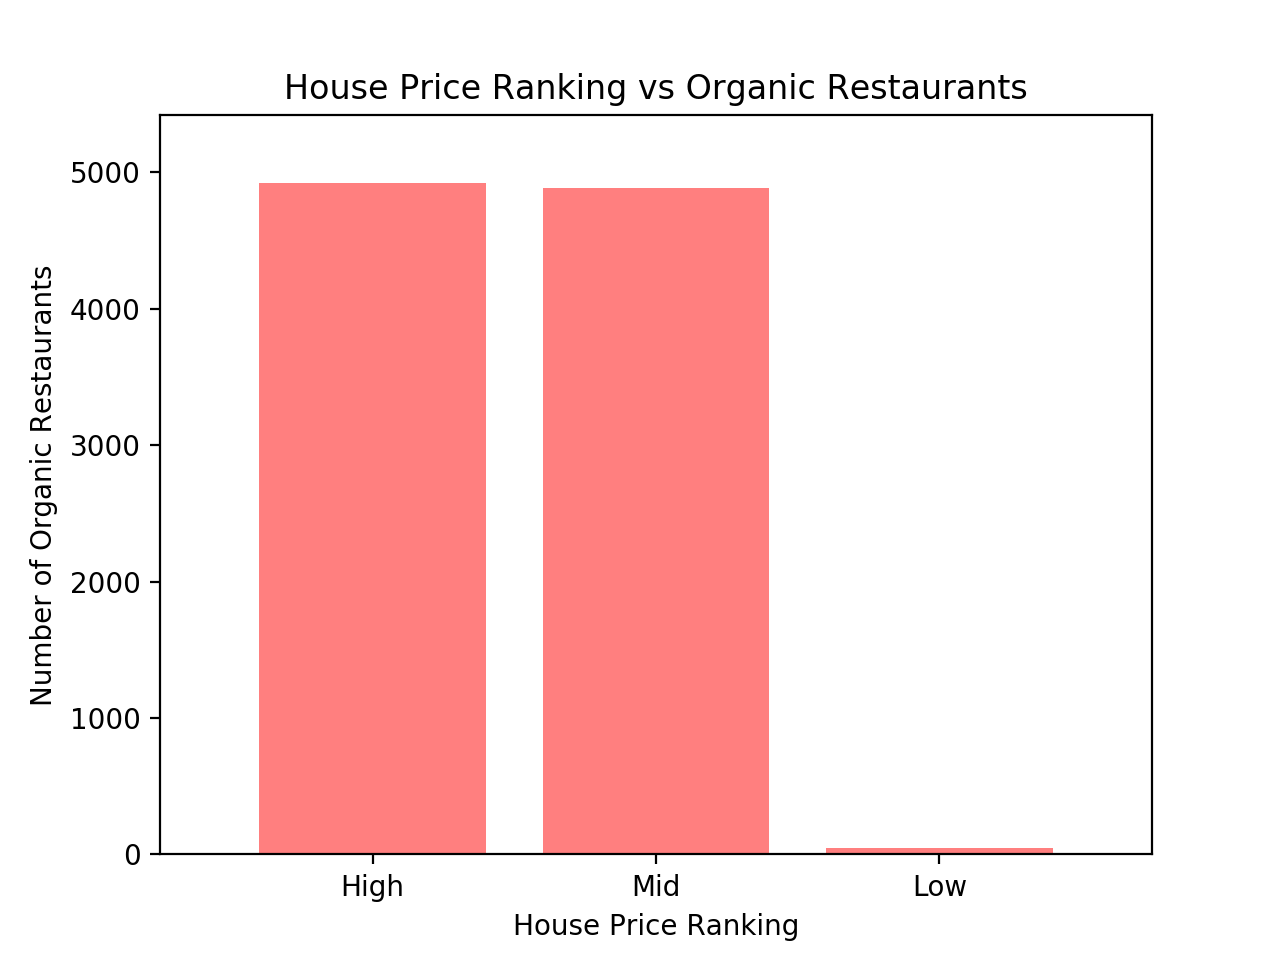

In [95]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, house_value, color='r', alpha=0.5, align="center")
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["High", "Mid", "Low"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(house_value)+500)
# Give our chart some labels and a tile
plt.title("House Price Ranking vs Organic Restaurants")
plt.xlabel("House Price Ranking")
plt.ylabel("Number of Organic Restaurants")
plt.savefig("Restaurant_house_value_count_bar_chart.png")

In [96]:

plt.show()